## Homework 1: Histogram Equalization and Specification

##### 1. Please prepare four images: (a) dark; (b) bright; (c) low contrast; (d) high contrast

    (a) Describe how you generate your four images. Show the images together with the corresponding histograms.

In [1]:
# import module
import cv2
import numpy as np
import matplotlib.pyplot  as plt

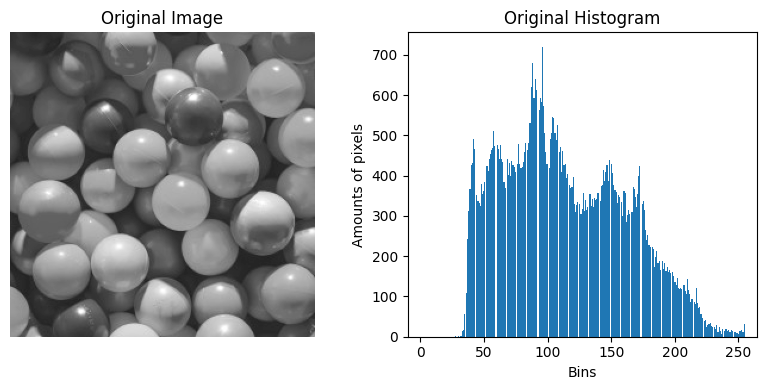

In [2]:
# load image and show the image and its histogram

original = cv2.imread('img\image.jpg', 0)
height, width = original.shape

plt.figure(num='original', figsize=(8,4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(original.flatten(), bins=256)
plt.title('Original Histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

plt.tight_layout()
plt.savefig('img\original image.png') 
plt.show()


In [3]:
# Create four new empty images for different adjustments
dark     = np.zeros((height, width), dtype=np.uint8)
bright   = np.zeros((height, width), dtype=np.uint8)
con_high = np.zeros((height, width), dtype=np.uint8)
con_low  = np.zeros((height, width), dtype=np.uint8)

In [4]:
# loop through every pixel of an image and operate with brightness, contrast
for x in range(width):
    for y in range(height):
        pixel = original[y, x]

        # dark
        brightness = -60
        dark[y, x] = max(0, min(255,  pixel + brightness))

        # bright
        brightness = 50
        bright[y, x] = max(0, min(255,  pixel + brightness))

        # low contrast
        contrast = 0.4
        con_low[y, x] = max(0, min(255, pixel * contrast))

        # high contrast
        contrast = 1.2
        con_high[y, x] = max(0, min(255, pixel * contrast))

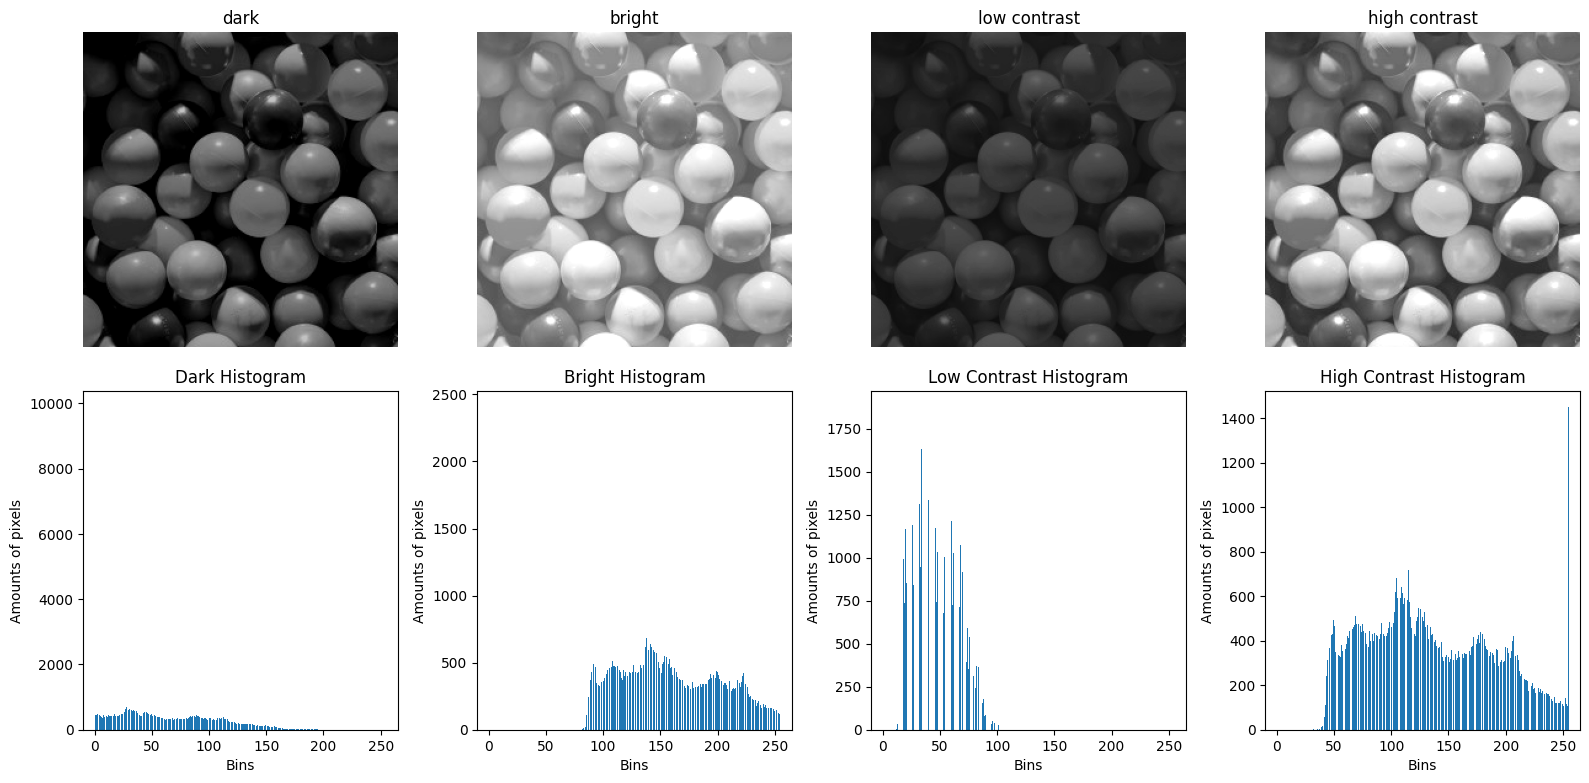

In [5]:
# Show the images together with the corresponding histograms
plt.figure(num='Ball Pit', figsize=(16,8))

# dark image
plt.subplot(2, 4, 1)
plt.title('dark')
plt.imshow(dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image
plt.subplot(2, 4, 2)
plt.title('bright')
plt.imshow(bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast
plt.subplot(2, 4, 3)
plt.title('low contrast')
plt.imshow(con_low, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast
plt.subplot(2, 4, 4)
plt.title('high contrast')
plt.imshow(con_high, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# dark image histogram
plt.subplot(2, 4, 5)
plt.hist(dark.flatten(), bins=256)
plt.title('Dark Histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# bright image histogram
plt.subplot(2, 4, 6)
plt.hist(bright.flatten(), bins=256)
plt.title('Bright Histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 4, 7)
plt.hist(con_low.flatten(), bins=256)
plt.title('Low Contrast Histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 4, 8)
plt.hist(con_high.flatten(), bins=256)
plt.title('High Contrast Histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')


plt.tight_layout()
plt.savefig(r'img\four images.png') 
plt.show()

    (b) Find the transfer curves to enhance these images, show the results and histograms as well. Please take into account of the methods of contrast stretching and equalization and be sure to give the comparison & discussion.

    Contrast stretching - Min-Max Stretching

In [ ]:
# Create four new empty images for Min-Max Stretching
minmax_dark     = np.zeros((height, width), dtype=np.uint8)
minmax_bright   = np.zeros((height, width), dtype=np.uint8)
minmax_low      = np.zeros((height, width), dtype=np.uint8)
minmax_high     = np.zeros((height, width), dtype=np.uint8)

In [6]:
# Get min and max pixel values for each image
min_dark, max_dark      = np.min(dark), np.max(dark)
min_bright, max_bright  = np.min(bright), np.max(bright)
min_low, max_low        = np.min(con_low), np.max(con_low)
min_high, max_high      = np.min(con_high), np.max(con_high)

new_min = 0
new_max = 255

In [7]:
# loop through every pixel of an image and apply Min-Max formula
for i in range(height):
    for j in range(width):
        minmax_dark[i,j]    = (dark[i,j] - min_dark) * (new_max - new_min) / (max_dark - min_dark) + new_min
        minmax_bright[i,j]  = (bright[i,j] - min_bright) * (new_max - new_min) / (max_bright - min_bright) + new_min
        minmax_low[i,j]     = (con_low[i,j] - min_low) * (new_max - new_min) / (max_low - min_low) + new_min
        minmax_high[i,j]    = (con_high[i,j] - min_high) * (new_max - new_min) / (max_high - min_high) + new_min

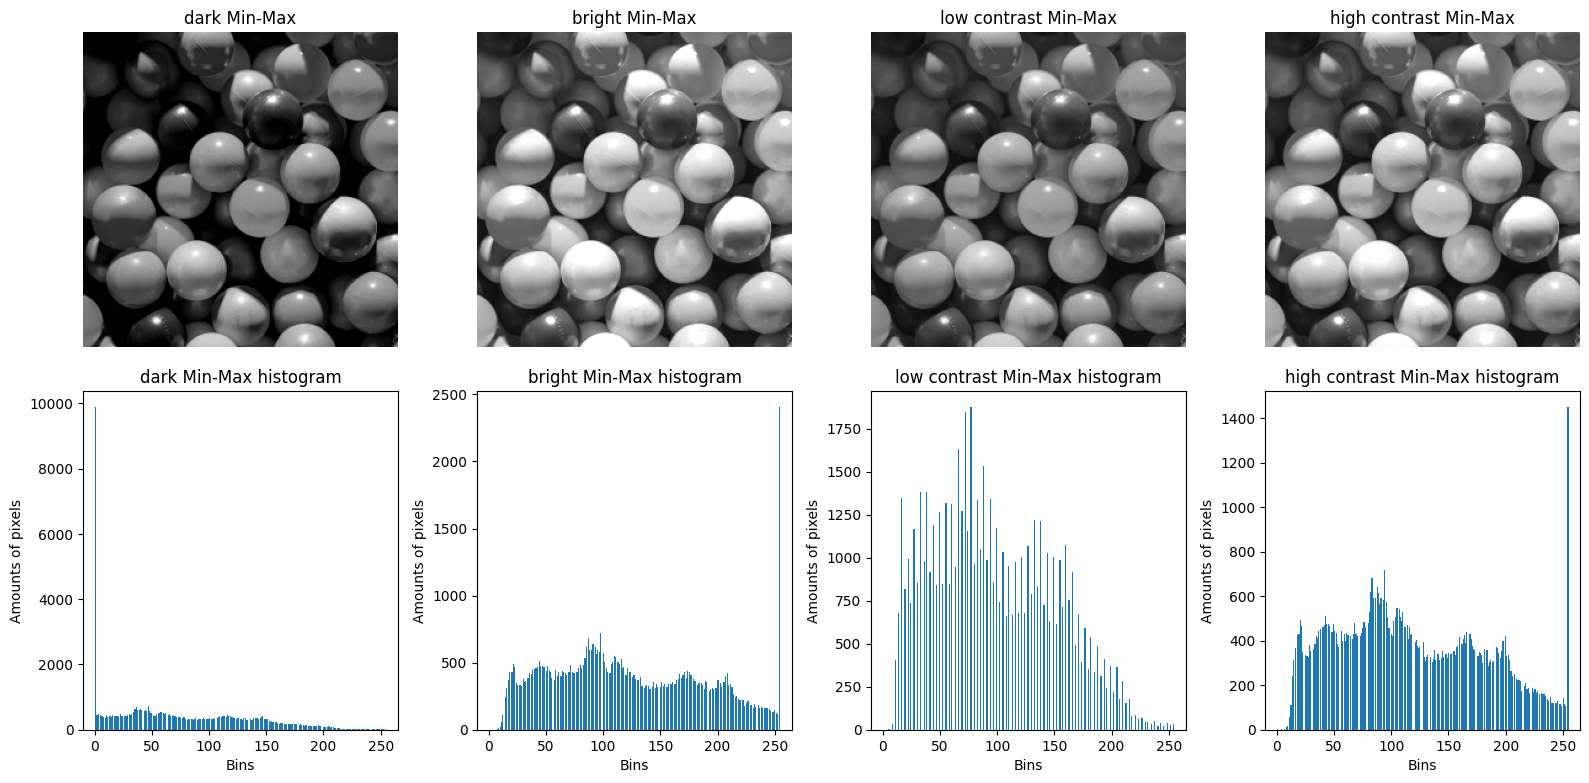

In [8]:
# Show the images together with the corresponding histograms
plt.figure(num='Ball Pit Min-Max', figsize=(16,8))

# dark image
plt.subplot(2, 4, 1)
plt.title('dark Min-Max')
plt.imshow(minmax_dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image
plt.subplot(2, 4, 2)
plt.title('bright Min-Max')
plt.imshow(minmax_bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast image
plt.subplot(2, 4, 3)
plt.title('low contrast Min-Max')
plt.imshow(minmax_low, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast image
plt.subplot(2, 4, 4)
plt.title('high contrast Min-Max')
plt.imshow(minmax_high, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# dark image histogram
plt.subplot(2, 4, 5)
plt.hist(minmax_dark.flatten(), bins=256)
plt.title('dark Min-Max histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# bright image histogram
plt.subplot(2, 4, 6)
plt.hist(minmax_bright.flatten(), bins=256)
plt.title('bright Min-Max histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 4, 7)
plt.hist(minmax_low.flatten(), bins=256)
plt.title('low contrast Min-Max histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 4, 8)
plt.hist(minmax_high.flatten(), bins=256)
plt.title('high contrast Min-Max histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

plt.tight_layout()
plt.savefig(r'img\Min-Max stretching images.png') 
plt.show()

    Equalization - Histogram Equilization

In [9]:
# Declare the Histogram Equalization function
def histogram_equilization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cum_hist = np.cumsum(hist)
    cum_hist_normalized = cum_hist / float(cum_hist.max())
    lut = np.round((256 - 1) * cum_hist_normalized)
    return lut[img]

In [10]:
# Apply histogram equalization to every image
he_dark = histogram_equilization(dark)
he_bright = histogram_equilization(bright)
he_low = histogram_equilization(con_low)
he_high = histogram_equilization(con_high)

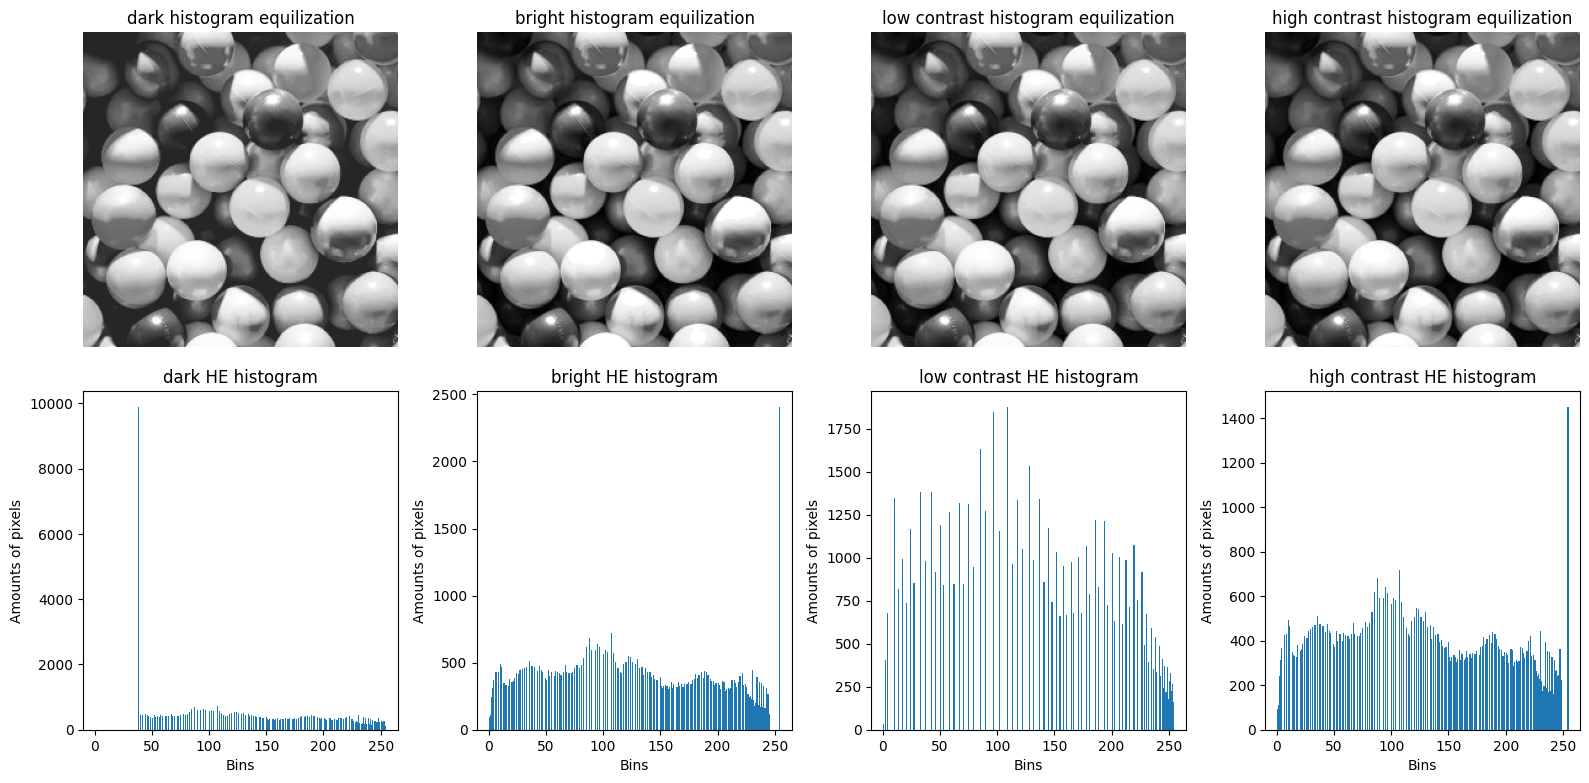

In [11]:
# Show the images together with the corresponding histograms
plt.figure(num='Ball Pit Histogram Equilization', figsize=(16,8))

# dark image
plt.subplot(2, 4, 1)
plt.title('dark histogram equilization')
plt.imshow(he_dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image
plt.subplot(2, 4, 2)
plt.title('bright histogram equilization')
plt.imshow(he_bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast image
plt.subplot(2, 4, 3)
plt.title('low contrast histogram equilization')
plt.imshow(he_low, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast image
plt.subplot(2, 4, 4)
plt.title('high contrast histogram equilization')
plt.imshow(he_high, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# dark image histogram
plt.subplot(2, 4, 5)
plt.hist(he_dark.flatten(), bins=256)
plt.title('dark HE histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# bright image histogram
plt.subplot(2, 4, 6)
plt.hist(he_bright.flatten(), bins=256)
plt.title('bright HE histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 4, 7)
plt.hist(he_low.flatten(), bins=256)
plt.title('low contrast HE histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 4, 8)
plt.hist(he_high.flatten(), bins=256)
plt.title('high contrast HE histogram')
plt.xlabel('Bins')
plt.xlim([-10, 265])
plt.ylabel('Amounts of pixels')

plt.tight_layout()
plt.savefig(r'img\histogram equilization images.png') 
plt.show()

##### 2. Select one noon picture from the internet, Most area of the noon is nearly dark because there is no light there.Enhance the selected image by using equalization and specification,compare the results and give a discussion.